In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 99% 20.0M/20.1M [00:01<00:00, 25.0MB/s]
100% 20.1M/20.1M [00:01<00:00, 14.4MB/s]


In [3]:
!unzip udea*.zip > /dev/null

In [4]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


In [5]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 12)


In [6]:
from rlxutils import subplots
import matplotlib.pyplot as plt

In [7]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


# Preprocesado de datos
En base a la exploracion de los datos, escogi trabajar con las siguientes columnas:

-PAGO MATRICULA PROPIO

-FAMI_EDUCACIONPADRE

RENDIMIENTO_GLOBAL

In [8]:
datos = z[['ESTU_PAGOMATRICULAPROPIO', 'FAMI_EDUCACIONPADRE','RENDIMIENTO_GLOBAL']]
datos.head()

,ESTU_PAGOMATRICULAPROPIO,FAMI_EDUCACIONPADRE,RENDIMIENTO_GLOBAL
0,No,Técnica o tecnológica incompleta,medio-alto
1,No,Técnica o tecnológica completa,bajo
2,No,Secundaria (Bachillerato) completa,bajo
3,No,No sabe,alto
4,No,Primaria completa,medio-bajo


Limpieza de datos nulos

In [9]:
sum(datos.ESTU_PAGOMATRICULAPROPIO.isna()), sum(datos.FAMI_EDUCACIONPADRE.isna())

(6498, 23178)

In [10]:
datos.ESTU_PAGOMATRICULAPROPIO.values[datos.ESTU_PAGOMATRICULAPROPIO.isna()] = 'no info'
datos.FAMI_EDUCACIONPADRE.values[datos.FAMI_EDUCACIONPADRE.isna()] = 'no info'
sum(datos.ESTU_PAGOMATRICULAPROPIO.isna()), sum(datos.FAMI_EDUCACIONPADRE.isna())

(0, 0)

Limpieza de FAMI_EDUCACIONPADRE

In [11]:
datos = datos.copy()
datos.FAMI_EDUCACIONPADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in datos.FAMI_EDUCACIONPADRE.values]

In [12]:
datos.FAMI_EDUCACIONPADRE.value_counts()

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,128289
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
no info,48999
Postgrado,44169
Educación profesional incompleta,27084


In [13]:
x = datos.FAMI_EDUCACIONPADRE.values
FAMI_EDUCACIONPADRE_vals = sorted(np.unique(x))
FAMI_EDUCACIONPADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONPADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONPADRE_vals)}
FAMI_EDUCACIONPADRE_onehot_vals

{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [14]:
FAMI_EDUCACIONPADRE_onehot_enc = np.r_[[FAMI_EDUCACIONPADRE_onehot_vals[i] for i in datos.FAMI_EDUCACIONPADRE]]
FAMI_EDUCACIONPADRE_onehot_enc

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
FAMI_EDUCACIONPADRE_df = pd.DataFrame(FAMI_EDUCACIONPADRE_onehot_enc, columns=[f"FAMI_EDUCACIONPADRE__{v}" for v in FAMI_EDUCACIONPADRE_onehot_vals])
FAMI_EDUCACIONPADRE_df

,FAMI_EDUCACIONPADRE__Educación profesional completa,FAMI_EDUCACIONPADRE__Educación profesional incompleta,FAMI_EDUCACIONPADRE__Ninguno,FAMI_EDUCACIONPADRE__Postgrado,FAMI_EDUCACIONPADRE__Primaria completa,FAMI_EDUCACIONPADRE__Primaria incompleta,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE__Técnica o tecnológica completa,FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE__no info
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Limpieza de pago matricula Propio

In [16]:
y = datos.ESTU_PAGOMATRICULAPROPIO.values
ESTU_PAGOMATRICULAPROPIO_vals = sorted(np.unique(y))
ESTU_PAGOMATRICULAPROPIO_onehot_vals = {val: np.eye(len(ESTU_PAGOMATRICULAPROPIO_vals))[i] for i,val in enumerate(ESTU_PAGOMATRICULAPROPIO_vals)}
ESTU_PAGOMATRICULAPROPIO_onehot_vals

{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [17]:
ESTU_PAGOMATRICULAPROPIO_onehot_enc = np.r_[[ESTU_PAGOMATRICULAPROPIO_onehot_vals[i] for i in datos.ESTU_PAGOMATRICULAPROPIO]]
ESTU_PAGOMATRICULAPROPIO_onehot_enc

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [18]:
ESTU_PAGOMATRICULAPROPIO_df = pd.DataFrame(ESTU_PAGOMATRICULAPROPIO_onehot_enc, columns=[f"ESTU_PAGOMATRICULAPROPIO__{v}" for v in ESTU_PAGOMATRICULAPROPIO_onehot_vals])
ESTU_PAGOMATRICULAPROPIO_df

,ESTU_PAGOMATRICULAPROPIO__No,ESTU_PAGOMATRICULAPROPIO__Si,ESTU_PAGOMATRICULAPROPIO__no info
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
692495,0.0,1.0,0.0
692496,1.0,0.0,0.0
692497,0.0,1.0,0.0
692498,0.0,1.0,0.0


In [19]:
datos = pd.concat([FAMI_EDUCACIONPADRE_df, datos], axis=1).drop('FAMI_EDUCACIONPADRE', axis=1)
datos.shape

(692500, 13)

In [20]:
datos = pd.concat([ESTU_PAGOMATRICULAPROPIO_df, datos], axis=1).drop('ESTU_PAGOMATRICULAPROPIO', axis=1)
datos.shape

(692500, 15)

In [21]:
datos.head()

,ESTU_PAGOMATRICULAPROPIO__No,ESTU_PAGOMATRICULAPROPIO__Si,ESTU_PAGOMATRICULAPROPIO__no info,FAMI_EDUCACIONPADRE__Educación profesional completa,FAMI_EDUCACIONPADRE__Educación profesional incompleta,FAMI_EDUCACIONPADRE__Ninguno,FAMI_EDUCACIONPADRE__Postgrado,FAMI_EDUCACIONPADRE__Primaria completa,FAMI_EDUCACIONPADRE__Primaria incompleta,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE__Técnica o tecnológica completa,FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE__no info,RENDIMIENTO_GLOBAL
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,medio-alto
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,bajo
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,bajo
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,alto
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,medio-bajo


Limpieza de RENDIMIENTO_GLOBAL




In [22]:
y = 'RENDIMIENTO_GLOBAL'

rg = { 'bajo':0, 'medio-bajo':1, 'medio-alto':2, 'alto': 3}
datos[y] = [rg[i] for i in datos[y]]

In [23]:
datos.head()

,ESTU_PAGOMATRICULAPROPIO__No,ESTU_PAGOMATRICULAPROPIO__Si,ESTU_PAGOMATRICULAPROPIO__no info,FAMI_EDUCACIONPADRE__Educación profesional completa,FAMI_EDUCACIONPADRE__Educación profesional incompleta,FAMI_EDUCACIONPADRE__Ninguno,FAMI_EDUCACIONPADRE__Postgrado,FAMI_EDUCACIONPADRE__Primaria completa,FAMI_EDUCACIONPADRE__Primaria incompleta,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE__Técnica o tecnológica completa,FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE__no info,RENDIMIENTO_GLOBAL
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Construcción del modelo

In [24]:
datos = datos[sorted(datos.columns)]

X = datos[[c for c in datos.columns if c!=y]].values
Y = datos[y].values
X.shape, Y.shape

((692500, 14), (692500,))

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
Xtr, Xts, ytr, yts = train_test_split(X,Y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 14), (138500, 14), (554000,), (138500,))

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtr, ytr)

RandomForestClassifier()

In [32]:
preds_tr = rf.predict(Xtr)
preds_ts = rf.predict(Xts)

In [33]:
print (preds_tr[:10])
print (preds_ts[:10])

[1 3 3 3 0 3 0 0 3 3]
[3 0 0 3 1 0 0 0 1 0]


In [34]:
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(0.3404620938628159, 0.3344259927797834)

Matriz de confusion

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)


cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

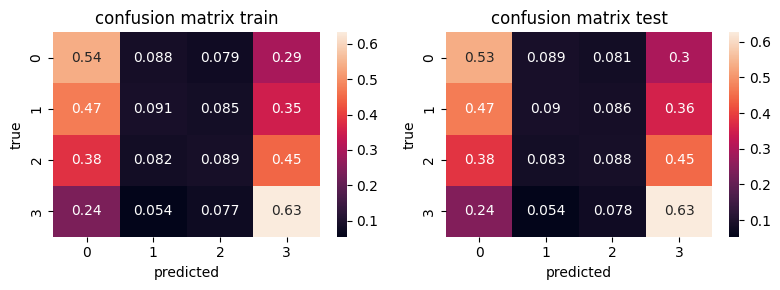

In [37]:
import seaborn as sns
for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")